## Least-Square Linear Regression

You have heard about (linear) classification methods and least-square linear regression in the lecture. 

__Task:__ Describe the difference between regression and classification in one sentence. 

In the next part, we want to implement a least-square linear regression. This means that given a set of points $\{\mathbf{x_i},y_i\}$, $i = 1..N$, we want to find that line (or hyperplane in higher dimensions) which minimizes the least-square error. The least-square error measures the quadratic distance from the predicted points by the linear model to the actual values.

The general formula of the least square regression is $\mathbf{y} = \mathbf X \boldsymbol w+ \mathbf{\epsilon}$ where $\epsilon$ is a vector with dimensionality $\mathbb{R}^N$ containing the normally-distributed noise terms $N(0,\sigma^2)$, $\mathbf{y}$ is the vector of labels and $\mathbf{X}$ is the matrix of data points with dimensionality $\mathbb{R}^{NxD}$. We are interested in finding a good estimate $\hat{\boldsymbol w}$ of the true weight vector $\boldsymbol w$. You saw in the lecture that the estimate is given by:

\begin{equation}
\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

where $\mathbf{X}$ is the matrix of regressor data (the first column is all 1’s for the intercept), and $\mathbf{y}$ is the vector of the dependent variable data. 

__Tasks:__ 
1.  Look at how the following data is generated. What are the real parameters of w?
2.  We want to implement a least-square linear regression now. Follow the following steps:
    1. ) Bring the data in the correct shape as requested by the formula above.    
    2. ) Calculate the estimates of the coefficients w.
    3. ) Add the resulting line to the given scatter plot of the data.
    4. ) Compute the mean square-error of the residuals, i.e. $ \frac{1}{N}\sum_{i=1}^N \|y(x_i) - y_i \|^2$.
    5. ) Compare your results to the numpy built-in function np.linalg.lstsq(...)
3. Plot the residuals (e.g. using seaborn function residplot (you will need to install statsmodel with '_sudo pip3 install statsmodels_' ) and check the conditions of the linear regression.

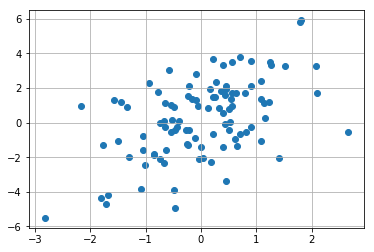

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Generate data
N_samples = 100
white_noise_stddev = 2
X = np.random.randn(N_samples,1)
eps = np.random.randn(N_samples,1)*white_noise_stddev
w = [1.3]
y = 0.5+w*X+eps

## Make Plot of the data
plt.scatter(X, y);
plt.grid()
plt.show()

(100, 2)
(100, 1)
The estimator intercept is 0.24 and the estimated slope is 1.20.
MSE is: 3.59
MSE from built-in function is: 3.59 


/home/mlss19/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


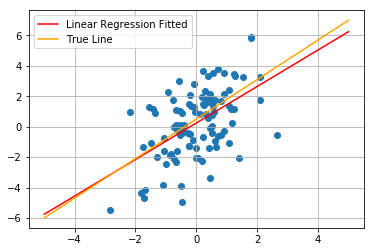

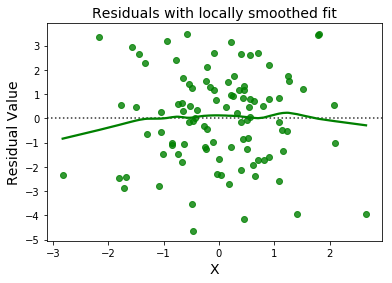

In [2]:
## 2. A) Bring the data in the correct shape
nrow = len(X)
X_stacked= np.column_stack((np.ones(nrow),X))
 
## Verify that the X and Y arrays have the same number of rows so that the matrix multiplication works
print(X_stacked.shape)
print(y.shape)
 
## B) Use the equation from above (X'X)^(-1)X'Y to calculate the estimate of the least-square coefficient:
# Hints:np.dot() computes the matrix-matrix product
#       np.linalg.inv() computes the matrix inverse
#       X.T is the transpose of X
w_est = np.dot(np.linalg.inv(np.dot(X_stacked.T,X_stacked)),np.dot(X_stacked.T,y))
print("The estimator intercept is %.2f and the estimated slope is %.2f." % (w_est[0],w_est[1]))

## C) Plot the resulting line
plt.figure()
plt.plot([-5,5],np.dot([[1, -5], [1, 5]],w_est),c='red',label='Linear Regression Fitted');
plt.plot([-5,5],np.dot([[1, -5], [1, 5]],[0.5,1.3]),c='orange',label='True Line');
plt.legend()
plt.scatter(X, y);
plt.grid()

## D) Compute the mean square-error (residual)
res_error=(np.dot(X_stacked,w_est)-y)*(np.dot(X_stacked,w_est)-y)
print("MSE is: %.2f" % ((sum(res_error)[0])/nrow))

## E) Compare to built-in function
beta_builtin,residual,_,_ = np.linalg.lstsq(X_stacked, y)
print("MSE from built-in function is: %.2f " % (residual[0]/nrow))

## 3) Plot the residuals
import seaborn as sns
plt.figure()
sns.residplot(np.squeeze(X), np.squeeze(y), lowess=True,  color="g")
plt.xlabel('X',fontsize = 14)
plt.ylabel('Residual Value', fontsize = 14)
plt.title('Residuals with locally smoothed fit', fontsize = 14)
plt.show()

## Mathematical concepts of linear regression

We want to look more closely at the mathematical backgrounds of the least-square linear regression. One step before obtaining the final solution $\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$, one has the so-called normal equations: \begin{equation}
(\mathbf{X}^{\rm T}\mathbf{X}) \hat{\boldsymbol w} = \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

### Q3.1.1 Which condition on X has to be satisifed such that $(\mathbf{X}^{\rm T}\mathbf{X})$ can be inverted?

__Answer:__ $rank(X) = D$. One can show that then $D = rank(X) = rank(X^TX)$ follows (*proof below) which means that $X^TX \in \mathbf{R}^{DxD}$ has full rank and is invertible.

Proof: To show: $rank(A) = rank(A^TA)$ for any matrix $A \in \mathbf{R}^{NxD}$. This is equivalent to showing that the null space of both matrices are the same (remember the Rank–nullity theorem stating that for $A \in \mathbf{R}^{NxD}$, we have that $rk(A) + nul(A) = D$). So we have to show that $nul(A) = nul(A^TA)$ which is equivalent to:

\begin{equation}
A^T A x = 0 \Longleftrightarrow A x = 0
\end{equation}

"$\impliedby$" Assuming that $Ax=0$, we obtain that $A^T A x = A 0 = 0$.

"$\implies$"  Assuming $A^T A x = 0$
$\implies x^T A^T A x = 0$ 
$\implies (Ax)^T (Ax) = 0$ 
$\implies Ax = 0$.

Note that this last step only holds for real matrices A. We have shown that the null spaces are identical and therefore, the rank of both matrices is the same which completes the proof.

### Q3.1.2 Name scenarios in which this condition is violated.

__Answer:__
* a scenario in which one feature is always zero.
* a scenario in which $N_{samples} < D_{features}$
* a scenario in which there is a perfect correlation between two features (e.g. Feature 1) height in meters and Feature 2) height in feet)

In case, $(\mathbf{X}^{\rm T}\mathbf{X})$ is not invertible, one applies a so-called Moore-Penrose pseudoinverse. This is a generalization of the common matrix inversion to singular or non-quadratic matrices.

__Task__: Read about the pseudoinverse and list three properties of the pseudoinverse.


## The role of outliers in least-square linear regression: 

Sometimes the data is not as clean as in the above case. In the following data set, we added one additional point [45,12] to the previous data set. We want to investigate how this point influences the estimates of $\mathbf w$ and find a strategy to avoid any occurring problems.

__Tasks:__
1. Apply a least square linear estimator to the new data set and visualize the results
2. Compare the estimator for w with the one from before.
3. Plot the residuals.
4. In the lecture you have heard several conditions on the residual which should be satisfied for the linear regression. Check them in this case! 

__Hint__: You should re-run the simulation a few times to answer question number 4).

/home/mlss19/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


[0.27773849 0.30710155]
[0.24280302 1.20099483]


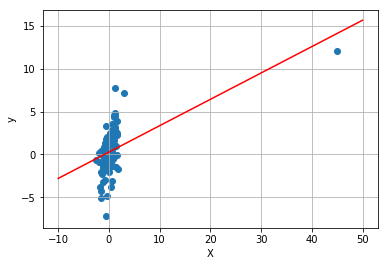

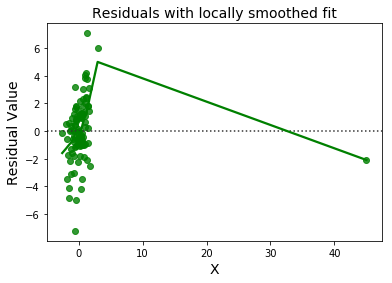

In [3]:
## Data Generation as before plus one outlier [45,12]
import seaborn as sns
n = 100
white_noise_sd = 2
X = np.random.randn(n,1)
eps = np.random.randn(n,1)*white_noise_sd
w = [1.3]
y = 0.5+w*X+eps
X = np.append(X,45)
y = np.append(y,12)

# 1) Apply a least square linear estimator to the new data set
nrow = len(X)
X_stacked= np.column_stack((np.ones(nrow),X))
w_est_2,resid_2,rank,sigma = np.linalg.lstsq(X_stacked, y)
res_error=(np.dot(X_stacked,w_est_2)-y)*(np.dot(X_stacked,w_est_2)-y)

# 2) Compare estimator for w and visualize the results
print(w_est_2)
print(w_est.T[0])

plt.figure()
plt.grid()
plt.plot([-10,50],np.dot([[1, -10], [1, 50]],w_est_2),c='red');
plt.scatter(X, y);
plt.xlabel('X')
plt.ylabel('y')
plt.show();

# 3) Plot the residuals
# Seaborn plot (statsmodels package is necessary. Get it via: ""sudo pip3 install statsmodels"")
plt.figure()
sns.residplot(X, y, lowess=True, color="g")
plt.xlabel('X',fontsize = 14)
plt.ylabel('Residual Value', fontsize = 14)
plt.title('Residuals with locally smoothed fit', fontsize = 14)
plt.show()

### Q3.1.3 What do you conclude from this example regarding the estimated weight vector and residuals? 

__Answer:__ The estimators for $\mathbf{w}$ are very different. This means that ordinary least square linear regression is not robust to outliers. Even a single outlier can totally change the coefficient estimates. 

In the data set scenario with the outlier, the problem is that the residuals do not fulfill $E[\epsilon_i] = 0$ for $i = 1...N$. More precisely, there is a clear trend in the means of the error-terms: They are growing in the beginning and finally falling for the outlier term. This violation indicates that a linear regression might not be an appropriate model in this case.

### Q3.1.4 Think of possible strategies to avoid this problem.

__Answer:__ A solution to this problem is outlier detection and removal. One possible strategy is to compute the (Mahalanobis) distance of each point and drop points which exceed a certain value.

Another solution is to build an outlier detection method based on the residuals.

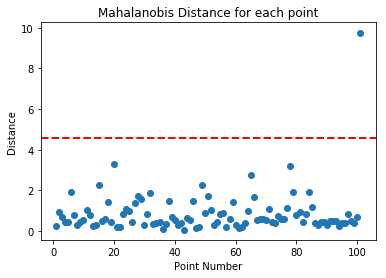

In [4]:
V = np.cov(X,y);
VI = np.linalg.inv(V)
means =  np.column_stack((np.mean(X),np.mean(y)))
data_points = np.column_stack((X,y))
d_mahalanobis = [(np.sqrt(np.dot(np.dot((data_point-means),VI),(data_point-means).T))) for data_point in data_points]
plt.figure();
plt.scatter( range(1,len(X_stacked)+1), d_mahalanobis );
plt.title('Mahalanobis Distance for each point');
plt.axhline(y=np.std(X), xmin=0, xmax =n, linewidth=2, color='r', linestyle='--')
plt.xlabel('Point Number');
plt.ylabel('Distance');
# We see that the outlier has a much higher Mahalanobis distance than the other points
# Threshold by "eye-balling" or quantiles (e.g. remove all points with a distance
# which exceeds 95% of the other distances)